In [1]:
%load_ext autoreload
%autoreload 2

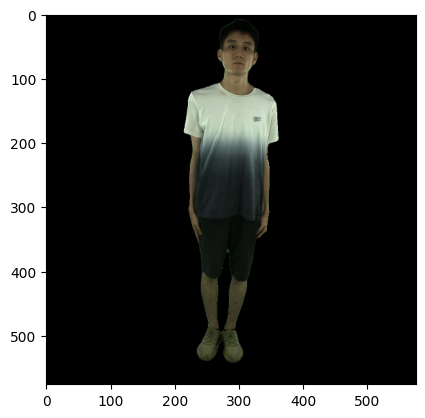

Decorative room divider filters apartment light into artistic patterns that create privacy shadows across the person's living.
576 576


100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


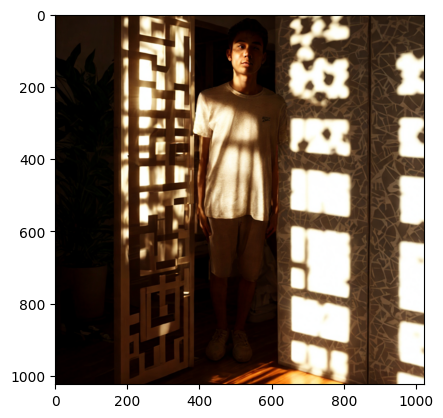

In [64]:
import numpy as np
from crop import crop_image
from ic_light import process_relight
import matplotlib.pyplot as plt
from prompt_sampler import PromptSampler
import cv2

def relight_image(image_path, mask_path, prompt_sampler=None):
    cropped_image = crop_image(
        image_path,
        mask_path,
        background_color=(0,) * 3
    )
    np_cropped = np.array(cropped_image)
    np_cropped = cv2.resize(np_cropped, (576, 576), interpolation=cv2.INTER_LANCZOS4)
    plt.imshow(np_cropped)
    plt.show()

    # enhance prompt
    if prompt_sampler is not None:
        light_prompt = prompt_sampler.sample_prompt()[0]
    else:
        light_prompt = "Steamy bathroom with a white LCD light above. Only one human present."

    print(light_prompt)

    # relight the image
    h, w, _ = np_cropped.shape

    h = h - (h % 8)
    w = w - (w % 8)
    
    print(h,w)

    input_fg, results = process_relight(
        np_cropped,
        light_prompt,
        w,
        h,
        1,
        12345,
        25,
        "best quality",
        "lowres, bad anatomy, bad hands, cropped, worst quality, pitch black",
        2.0, # cfg
        1024/576, # highres scale
        0.5, # highres denoise
        0.9, # lowres denoise
        "None"
    )

    return results[0]

relit = relight_image(
    "/workspace/datasetvol/mvhuman_data/mv_captures/101123/images_lr/CC32871A059/0005_img.jpg",
    "/workspace/datasetvol/mvhuman_data/mv_captures/101123/fmask_lr/CC32871A059/0005_img_fmask.png",
    prompt_sampler=PromptSampler("/workspace/datasetvol/light_prompts.txt")
)

plt.imshow(relit)
plt.show()